# Exploratory Data Analysis - XBox Auction Dataset Ebay

# What kind of questions are answered ?

1. What's the general statistics describing the dataset?
2. What's the relationship between the columns of the dataset?
3. Should a seller start an auction with a higher or lower opening bid (to attract more bidders)?
4. How length of the auction matters?
5. How a seller can achive maximum bid?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
dataset = pd.read_csv('Xbox 3-day auctions.csv')

In [3]:
dataset.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,8213034705,95.0,2.927373,jake7870,0,95.0,117.5
1,8213034705,115.0,2.943484,davidbresler2,1,95.0,117.5
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.0,117.5
3,8213034705,117.5,2.998947,daysrus,10,95.0,117.5
4,8213060420,2.0,0.065266,donnie4814,5,1.0,120.0


# EDA

## General info from the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 7 columns):
auctionid     557 non-null int64
bid           557 non-null float64
bidtime       557 non-null float64
bidder        553 non-null object
bidderrate    557 non-null int64
openbid       557 non-null float64
price         557 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 30.5+ KB


## Descriptive statistics derived from dataset

In [5]:
dataset.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000
mean,8.213990e+09,76.211346,2.076794,24.319569,25.799695,122.560987
std,8.747636e+05,43.506429,0.981151,91.286776,31.817030,33.977093
min,8.213035e+09,0.020000,0.009178,0.000000,0.010000,35.090000
25%,8.213297e+09,40.000000,1.210197,0.000000,0.990000,96.990000
50%,8.213760e+09,80.000000,2.554537,3.000000,9.990000,122.500000
75%,8.214435e+09,110.000000,2.907836,15.000000,50.000000,140.500000
max,8.215611e+09,207.500000,2.999919,1494.000000,110.000000,207.500000


In [6]:
dataset.columns

Index(['auctionid', 'bid', 'bidtime', 'bidder', 'bidderrate', 'openbid',
       'price'],
      dtype='object')

## Plot pairwise relationships in a dataset

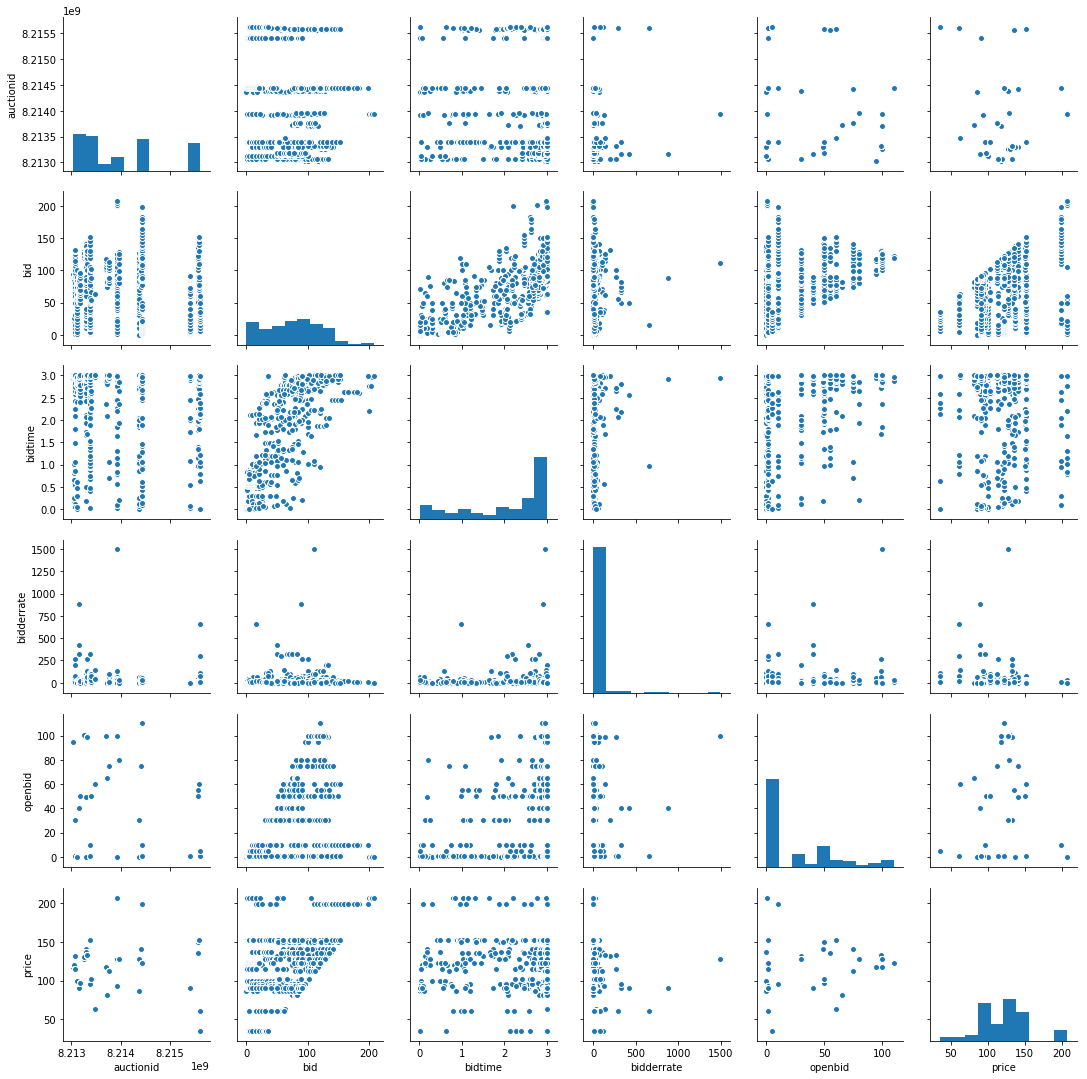

In [7]:
sns.pairplot(dataset)

## Distplot depicting average price range

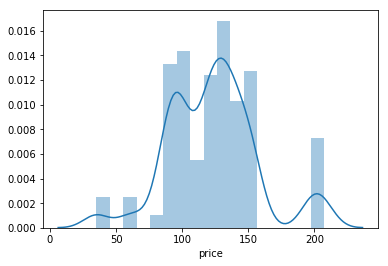

In [8]:
sns.distplot(dataset['price'])

## Provide correlation between the columns of dataset

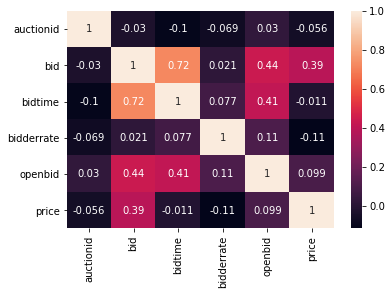

In [9]:
sns.heatmap(dataset.corr(), annot=True)

## It seems the bid and bidtime has the highest correlation
### As the bidtime increases the bid also increase as more and more people can participate.

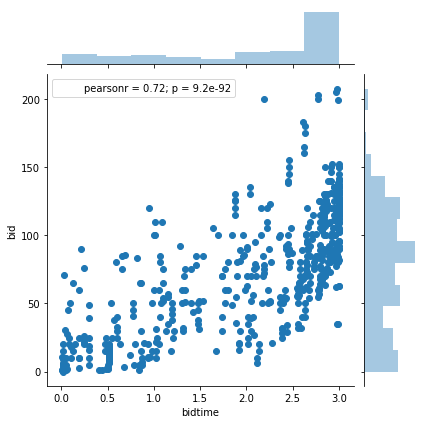

In [10]:
sns.jointplot(x='bidtime', y='bid', data=dataset)

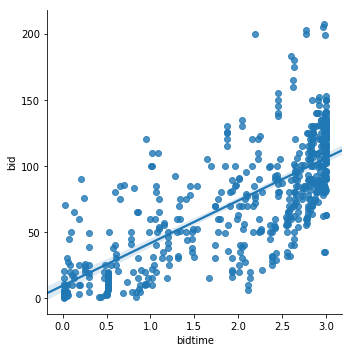

In [11]:
sns.lmplot(x='bidtime', y='bid', data=dataset)

## Analysis of open bid

### All products according to their final price and ther openbid

In [12]:
open_bid = dataset.groupby(['auctionid']).last()
open_bid

,bid,bidtime,bidder,bidderrate,openbid,price
auctionid,,,,,,
8213034705,117.50,2.998947,daysrus,10,95.00,117.50
8213060420,120.00,2.999722,djnoeproductions,17,1.00,120.00
8213067838,132.50,2.997789,*champaignbubbles*,202,29.99,132.50
8213073509,114.50,2.999236,rr6kids,4,1.00,114.50
8213119950,100.00,2.961597,danasdeals4you,0,0.01,100.00
8213162076,90.00,2.996748,damch47d,16,40.00,90.00
8213183841,95.99,2.999375,sirector,15,50.00,96.99
8213266411,127.50,2.998831,jbeaudoin_qc,8,100.16,127.50
8213266439,127.50,2.997928,sodulguy,0,100.16,130.00


In [13]:
open_bid['auctionid'] = open_bid.index

openbid along with their prices depicts lower openbids tends to have higher price and more bidders.

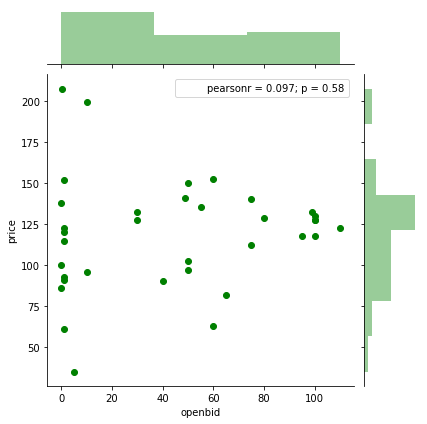

In [14]:
sns.jointplot(x='openbid', y='price', data=open_bid, kind='scatter', color='green')

## Bid and openbid provides some useful insights

### What are top 5 products to have maximum bids

In [15]:
dataset['auctionid'].value_counts().head()

8213387444    36
8214435010    35
8213119950    34
8215408023    28
8214378351    26
Name: auctionid, dtype: int64

### We can see that nearly all the top auctionids have a low openbid

#### Bidder must keep the opening bid as low as possible to attract more people, once people start to participate it creates the sense of competition eventually solding the product at a good pice.

As 36 bids were created when openbid is low

In [16]:
dataset[dataset['auctionid'] == 8213387444]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
190,8213387444,0.99,0.410127,255ricardo,3,0.99,152.0
191,8213387444,2.01,0.480370,bardcatcher,40,0.99,152.0
192,8213387444,3.59,0.681400,jna326,0,0.99,152.0
193,8213387444,7.00,0.868819,clay78626,2,0.99,152.0
194,8213387444,5.00,0.875706,jon19athan,4,0.99,152.0
195,8213387444,10.00,0.875856,jon19athan,4,0.99,152.0
196,8213387444,10.00,0.934711,clay78626,2,0.99,152.0
197,8213387444,11.00,0.934850,clay78626,2,0.99,152.0
198,8213387444,20.00,0.934988,clay78626,2,0.99,152.0
199,8213387444,11.01,0.957917,bardcatcher,40,0.99,152.0


In [17]:
dataset[dataset['auctionid'] == 8214378351]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
353,8214378351,75.75,0.242211,msu_cat,2,29.99,127.5
354,8214378351,30.99,1.027338,booboopupdog,0,29.99,127.5
355,8214378351,35.00,1.147975,lecmgc,0,29.99,127.5
356,8214378351,38.00,1.198160,marioc55,0,29.99,127.5
357,8214378351,42.00,1.198692,marioc55,0,29.99,127.5
358,8214378351,46.00,1.199051,marioc55,0,29.99,127.5
359,8214378351,49.00,1.847731,marioc55,0,29.99,127.5
360,8214378351,55.00,1.883773,mackynen123,0,29.99,127.5
361,8214378351,70.00,2.004178,2005winstonc,0,29.99,127.5
362,8214378351,90.00,2.004572,2005winstonc,0,29.99,127.5


### What are 5 auctions to have minimum bids

In [18]:
dataset['auctionid'].value_counts().tail()

8213266411    5
8213034705    4
8213472092    3
8213266439    3
8214435808    2
Name: auctionid, dtype: int64

#### When the opening bid is too high very less number of people participate leading the product being sold around the opening bid price.

As only 2 bids were created when openbid is high

In [19]:
dataset[dataset['auctionid'] == 8214435808]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
452,8214435808,122.5,2.873750,darkaglmax84,4,110.0,122.5
453,8214435808,120.0,2.961817,elai2005,26,110.0,122.5


As only 3 bids were created when openbid is high

In [20]:
dataset[dataset['auctionid'] == 8213266439]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
131,8213266439,130.0,2.963542,mikezor18,20,100.16,130.0
132,8213266439,122.5,2.997708,sodulguy,0,100.16,130.0
133,8213266439,127.5,2.997928,sodulguy,0,100.16,130.0


As only 5 bids were created when openbid is high

In [21]:
dataset[dataset['auctionid'] == 8213266411]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
126,8213266411,120.0,2.813437,jbeaudoin_qc,8,100.16,127.5
127,8213266411,124.0,2.813553,jbeaudoin_qc,8,100.16,127.5
128,8213266411,127.5,2.975312,jbeaudoin_qc,8,100.16,127.5
129,8213266411,125.0,2.998044,rayray2185,42,100.16,127.5
130,8213266411,127.5,2.998831,jbeaudoin_qc,8,100.16,127.5


## How many unique auctions are done?

In [22]:
dataset['auctionid'].nunique()

35

## Top 5 bidders according to number of bids in an auction

In [23]:
dataset['bidder'].value_counts().head()

4687daisy         15
lambonius1        12
danasdeals4you    11
bluebubbles_1     11
mniffin01         10
Name: bidder, dtype: int64

## How many days does an auction usually take?

In [24]:
dataset1 = dataset[['auctionid','bidtime']]

In [25]:
dataset1.head()

,auctionid,bidtime
0,8213034705,2.927373
1,8213034705,2.943484
2,8213034705,2.951285
3,8213034705,2.998947
4,8213060420,0.065266


In [26]:
max_bidtime = dataset1.groupby(['auctionid']).max()

In [27]:
max_bidtime.head()

,bidtime
auctionid,
8213034705,2.998947
8213060420,2.999722
8213067838,2.997789
8213073509,2.999236
8213119950,2.961597


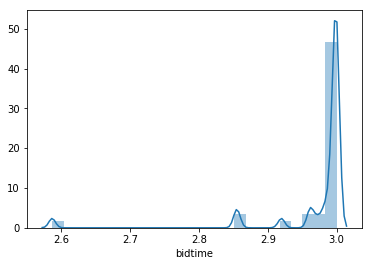

In [28]:
sns.distplot(max_bidtime['bidtime'], bins=25)

# Conclusion

### In general from above analysis I can conclude that a lower open bid and longer auction time can attract more bids in an auction.
#### For Sellers:

If your product is unique, rare and has high collection value, you can set a high open bid and limited auction time without worrying to scare potential customers.

If your product is common and has substitutes available, set a low open bid and make auction time as long as possible. This will attract more bidders, and you end up solding your product at a good price.